In [1]:
import keras
from musicnet.dataset import MusicNet
from keras.models import load_model

%matplotlib inline
import seaborn
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

from complexnn.conv import ComplexConv1D
from complexnn.bn import ComplexBN, ComplexBatchNormalization
from complexnn.init import sqrt_init
from keras import initializers
from keras.models import model_from_yaml
setattr(initializers, "sqrt_init", sqrt_init)

Using Theano backend.


In [8]:
dataset = MusicNet('/Tmp/serdyuk/data/musicnet_11khz.npz', complex_=True, fourier=True)
dataset.load()
Xtest, Ytest = dataset.eval_set('test')

In [5]:
model = model_from_yaml(open("models/complex_model.yaml"),
                   custom_objects={'ComplexConv1D': ComplexConv1D, 
                                   'ComplexBN': ComplexBN, 
                                   'sqrt_init': sqrt_init,
                                   'ComplexBatchNormalization': ComplexBatchNormalization})

In [20]:
model2 = model_from_yaml(open("models/real_model.yaml"),
                   custom_objects={'ComplexConv1D': ComplexConv1D, 
                                   'ComplexBN': ComplexBN, 
                                   'sqrt_init': sqrt_init,
                                   'ComplexBatchNormalization': ComplexBatchNormalization})

In [6]:
model.load_weights("models/complex_model.hdf5")

In [22]:
model2.load_weights("models/real_model.hdf5")

In [11]:
pr = model.predict(Xtest)

In [23]:
pr2 = model2.predict(Xtest)

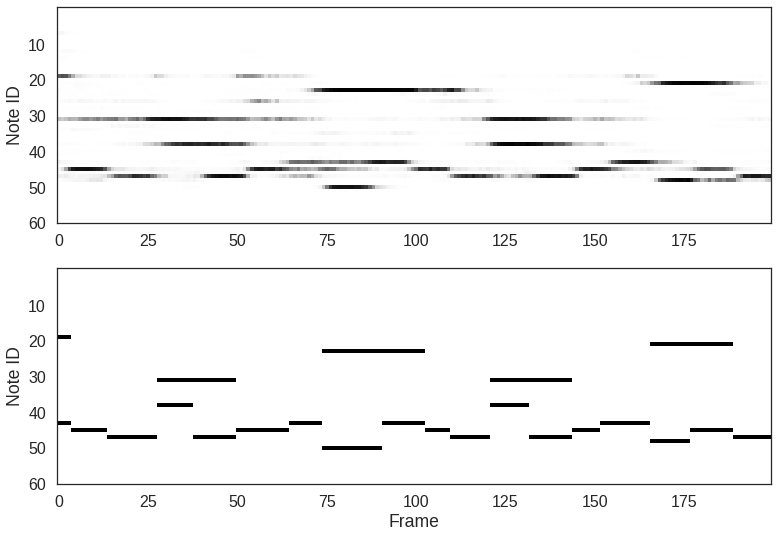

In [52]:
seaborn.set_style('white')
seaborn.set_context('poster')
plt.figure()
plt.subplot(211)
plt.imshow(pr[:200, 10:65].T)
plt.yticks(list(range(10, 65, 10)))
plt.ylabel('Note ID')

plt.subplot(212)
plt.imshow(Ytest[:200, 10:65].T)
plt.yticks(list(range(10, 65, 10)))
plt.xlabel('Frame')
plt.ylabel('Note ID')
plt.savefig("pred_gt.png")
plt.show()

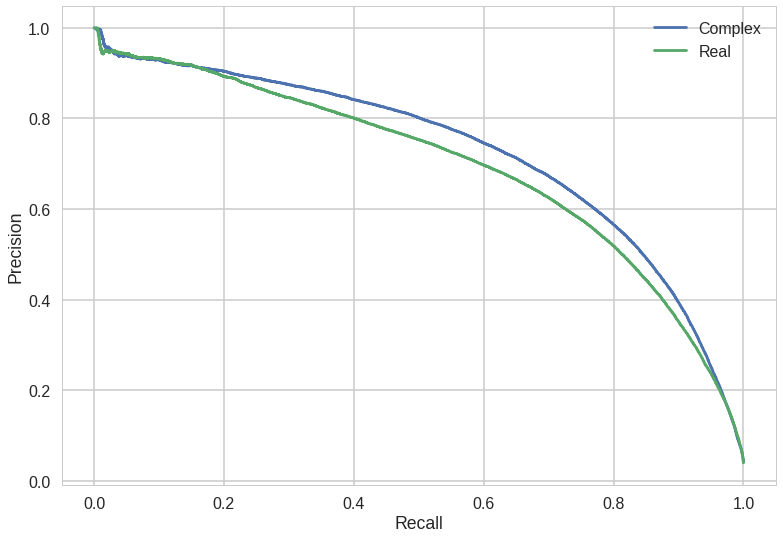

In [40]:
precision1, recall1, _ = precision_recall_curve(Ytest.flatten(), pr.flatten())
precision2, recall2, _ = precision_recall_curve(Ytest.flatten(), pr2.flatten())
seaborn.set_style('whitegrid')
seaborn.set_context('poster')
plt.figure()
mod1, = plt.plot(recall1, precision1)
mod2, = plt.plot(recall2, precision2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend([mod1, mod2], ["Complex", "Real"])
plt.savefig('precision_recall.png')